**Data Loading**

In [1]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Machine learning libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [2]:
# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

In [3]:
# Load the dataset
print("📥 LOADING IRIS DATASET...")
print("="*50)
df=pd.read_csv("/kaggle/input/iris/Iris.csv")
df.head(5)

📥 LOADING IRIS DATASET...


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Display basic info
print(f"\n📊 Dataset Shape: {df.shape}")
print(f"📋 Columns: {list(df.columns)}")
print("\nFirst 5 rows:")
print(df.head())
print("\n" + "="*50)


📊 Dataset Shape: (150, 6)
📋 Columns: ['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']

First 5 rows:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa



**Complete Exploratory Data Analysis (EDA)**

In [5]:
# Display complete dataset info
print("📋 DATASET INFORMATION:")
df.info()

📋 DATASET INFORMATION:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:

print("\n📊 DESCRIPTIVE STATISTICS:")
df.describe()


📊 DESCRIPTIVE STATISTICS:


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
print("\n🌼 SPECIES DISTRIBUTION:")
species_counts = df['Species'].value_counts()
print(species_counts)
print(f"\n• Total Samples: {len(df)}")
print(f"• Number of Species: {len(species_counts)}")
print(f"• Species: {', '.join(species_counts.index.tolist())}")


🌼 SPECIES DISTRIBUTION:
Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

• Total Samples: 150
• Number of Species: 3
• Species: Iris-setosa, Iris-versicolor, Iris-virginica


In [8]:

print("\n🧮 DATA TYPES:")
df.dtypes


🧮 DATA TYPES:


Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [9]:
print("\n🔍 CHECKING FOR MISSING VALUES:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0] if missing_values.sum() > 0 else "✅ No missing values found!")


🔍 CHECKING FOR MISSING VALUES:
✅ No missing values found!


In [10]:
print("\n🔍 CHECKING FOR DUPLICATES:")
duplicates = df.duplicated().sum()
print(f"Duplicates found: {duplicates}")
if duplicates > 0:
    print(f"Removing {duplicates} duplicate rows...")
    df = df.drop_duplicates()
    print(f"New shape: {df.shape}")


🔍 CHECKING FOR DUPLICATES:
Duplicates found: 0


**Statistical Analysis by Species**

In [11]:
# Group by species for statistical analysis
numeric_cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

print("📊 MEASUREMENTS BY SPECIES:")
for col in numeric_cols:
    print(f"\n{col}:")
    stats_by_species = df.groupby('Species')[col].agg(['mean', 'median', 'std', 'min', 'max'])
    print(stats_by_species.round(2))

📊 MEASUREMENTS BY SPECIES:

SepalLengthCm:
                 mean  median   std  min  max
Species                                      
Iris-setosa      5.01     5.0  0.35  4.3  5.8
Iris-versicolor  5.94     5.9  0.52  4.9  7.0
Iris-virginica   6.59     6.5  0.64  4.9  7.9

SepalWidthCm:
                 mean  median   std  min  max
Species                                      
Iris-setosa      3.42     3.4  0.38  2.3  4.4
Iris-versicolor  2.77     2.8  0.31  2.0  3.4
Iris-virginica   2.97     3.0  0.32  2.2  3.8

PetalLengthCm:
                 mean  median   std  min  max
Species                                      
Iris-setosa      1.46    1.50  0.17  1.0  1.9
Iris-versicolor  4.26    4.35  0.47  3.0  5.1
Iris-virginica   5.55    5.55  0.55  4.5  6.9

PetalWidthCm:
                 mean  median   std  min  max
Species                                      
Iris-setosa      0.24     0.2  0.11  0.1  0.6
Iris-versicolor  1.33     1.3  0.20  1.0  1.8
Iris-virginica   2.03     2.0  0.27  

In [12]:
print("\n📏 RANGE ANALYSIS:")
for col in numeric_cols:
    print(f"\n{col}:")
    range_by_species = df.groupby('Species')[col].agg(lambda x: f"{x.min():.1f} - {x.max():.1f}")
    print(range_by_species)


📏 RANGE ANALYSIS:

SepalLengthCm:
Species
Iris-setosa        4.3 - 5.8
Iris-versicolor    4.9 - 7.0
Iris-virginica     4.9 - 7.9
Name: SepalLengthCm, dtype: object

SepalWidthCm:
Species
Iris-setosa        2.3 - 4.4
Iris-versicolor    2.0 - 3.4
Iris-virginica     2.2 - 3.8
Name: SepalWidthCm, dtype: object

PetalLengthCm:
Species
Iris-setosa        1.0 - 1.9
Iris-versicolor    3.0 - 5.1
Iris-virginica     4.5 - 6.9
Name: PetalLengthCm, dtype: object

PetalWidthCm:
Species
Iris-setosa        0.1 - 0.6
Iris-versicolor    1.0 - 1.8
Iris-virginica     1.4 - 2.5
Name: PetalWidthCm, dtype: object


**Advanced Data Visualization**


📊 VISUALIZING DATA DISTRIBUTIONS


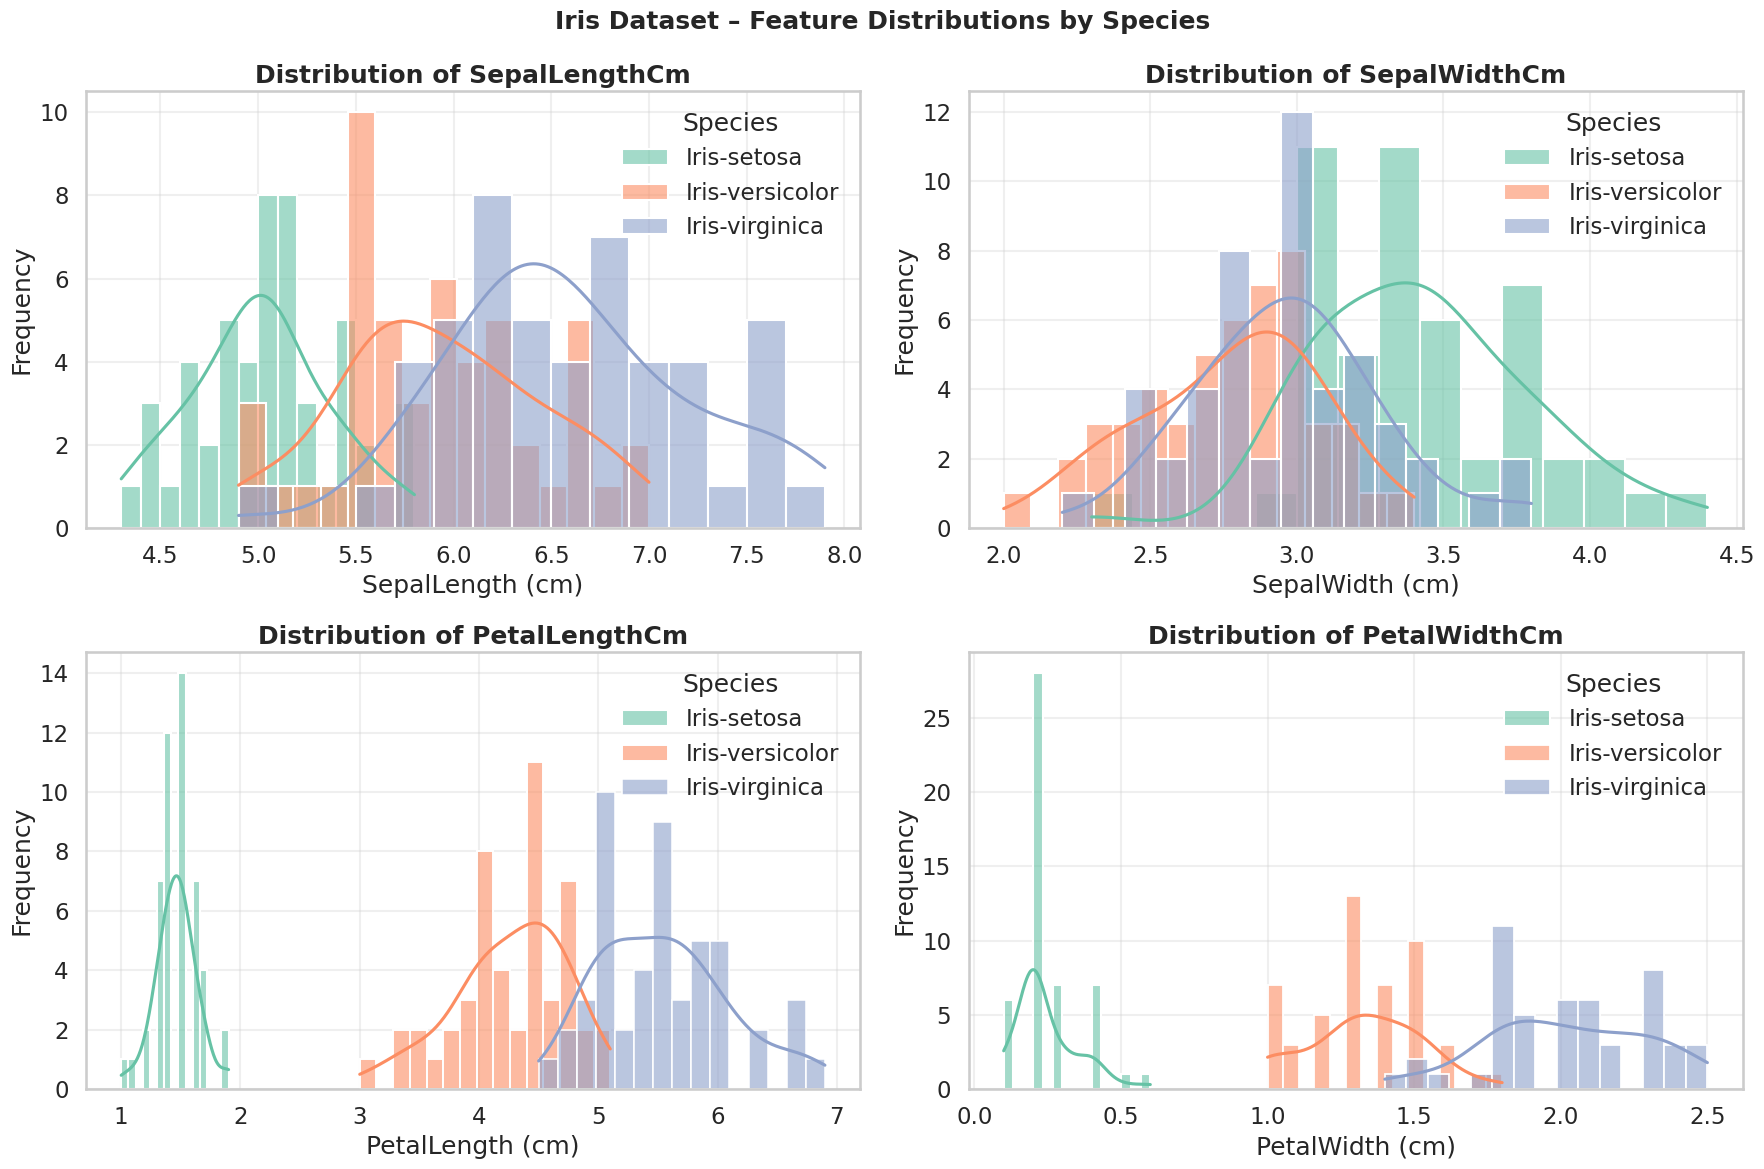

In [22]:
print("\n📊 VISUALIZING DATA DISTRIBUTIONS")
print("=" * 50)

plt.figure(figsize=(18, 12))
plt.suptitle('Iris Dataset – Feature Distributions by Species',
             fontsize=18, fontweight='bold')

for i, feature in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    
    for species in df['Species'].unique():
        sns.histplot(
            df[df['Species'] == species][feature],
            kde=True,
            bins=15,
            alpha=0.6,
            label=species
        )
    
    plt.title(f'Distribution of {feature}', fontweight='bold')
    plt.xlabel(feature.replace('Cm', ' (cm)'))
    plt.ylabel('Frequency')
    plt.legend(title='Species')
    plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


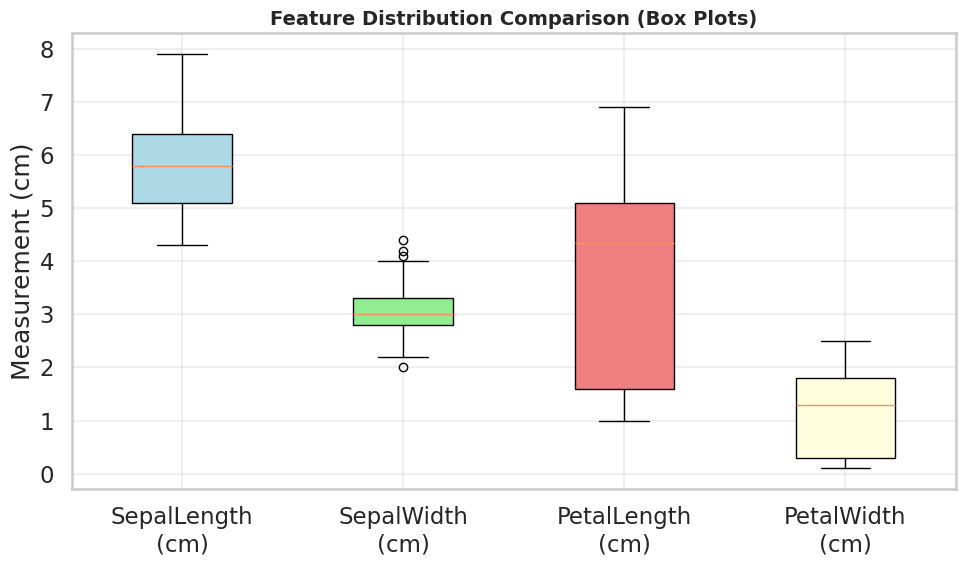

In [23]:
#Box plots by species
plt.figure(figsize=(10, 6))

box_data = []
labels = []

for feature in numeric_cols:
    box_data.append(df[feature].values)
    labels.append(feature.replace('Cm', '\n(cm)'))

bp = plt.boxplot(
    box_data,
    labels=labels,
    patch_artist=True
)

# Apply colors
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightyellow']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

plt.title('Feature Distribution Comparison (Box Plots)',
          fontsize=14, fontweight='bold')
plt.ylabel('Measurement (cm)')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

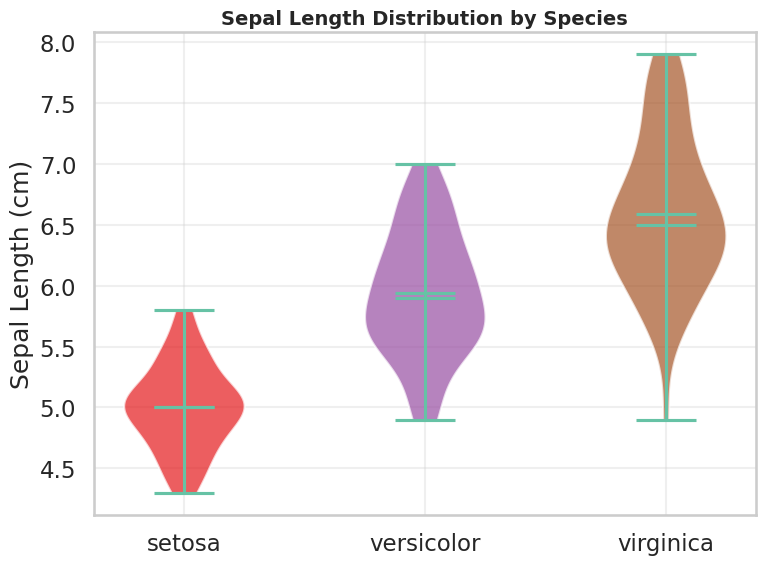

In [24]:
#Violin plots
plt.figure(figsize=(8, 6))

violin_data = []
violin_labels = []

for species in df['Species'].unique():
    violin_data.append(
        df[df['Species'] == species]['SepalLengthCm'].values
    )
    violin_labels.append(species.replace('Iris-', ''))

parts = plt.violinplot(
    violin_data,
    showmeans=True,
    showmedians=True
)

# Color violins
for i, pc in enumerate(parts['bodies']):
    pc.set_facecolor(plt.cm.Set1(i / len(violin_data)))
    pc.set_alpha(0.7)

plt.xticks(
    ticks=np.arange(1, len(violin_labels) + 1),
    labels=violin_labels
)

plt.title('Sepal Length Distribution by Species',
          fontsize=14, fontweight='bold')
plt.ylabel('Sepal Length (cm)')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

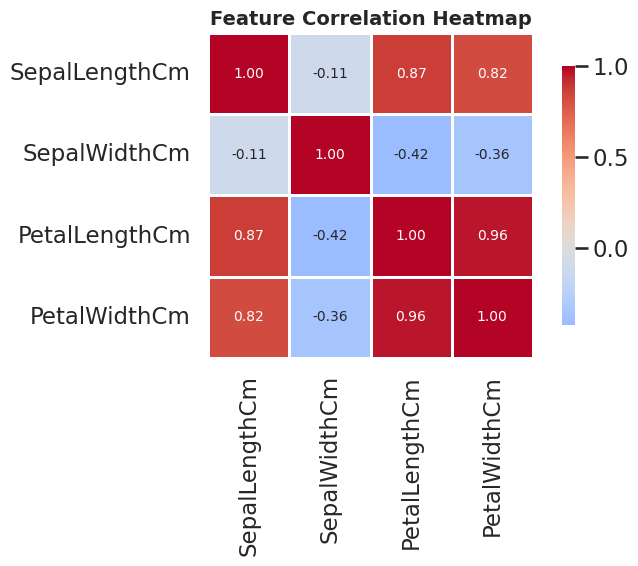

In [25]:
# Correlation heatmap
plt.figure(figsize=(8, 6))

correlation_matrix = df[numeric_cols].corr()

# Plot heatmap
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=1,
    cbar_kws={"shrink": 0.8},
    annot_kws={'size': 10}
)

plt.title('Feature Correlation Heatmap',
          fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

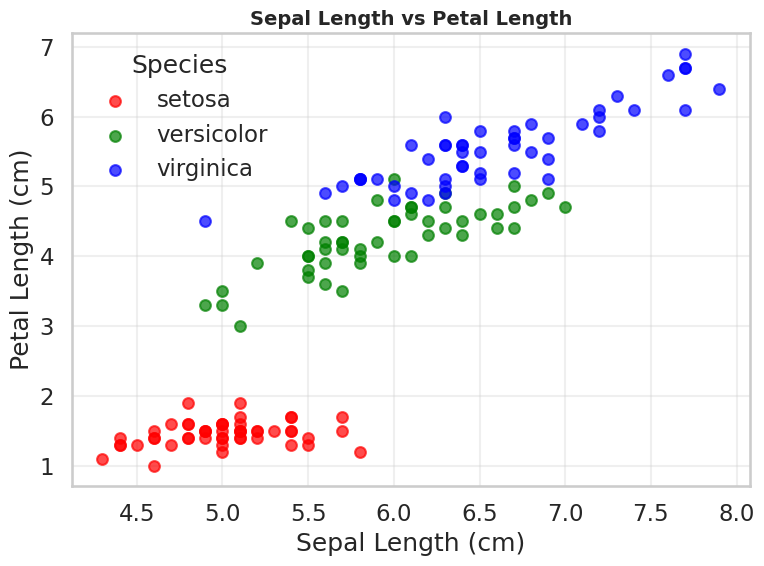

In [26]:
#Pairwise scatter plots
plt.figure(figsize=(8, 6))

colors = {
    'Iris-setosa': 'red',
    'Iris-versicolor': 'green',
    'Iris-virginica': 'blue'
}

for species in df['Species'].unique():
    species_data = df[df['Species'] == species]
    plt.scatter(
        species_data['SepalLengthCm'],
        species_data['PetalLengthCm'],
        alpha=0.7,
        s=60,
        label=species.replace('Iris-', ''),
        color=colors.get(species, 'gray')
    )

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.title('Sepal Length vs Petal Length',
          fontsize=14, fontweight='bold')
plt.legend(title='Species')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

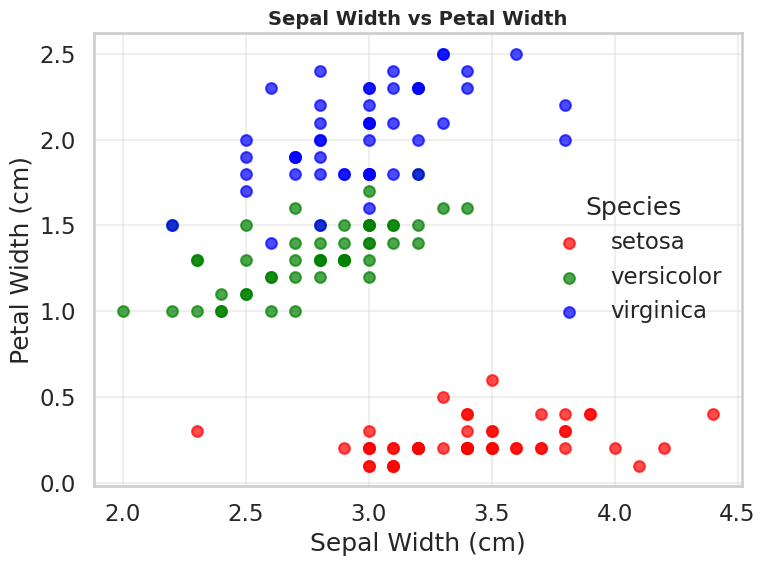

In [27]:
#3D visualization (2D projection)
plt.figure(figsize=(8, 6))

colors = {
    'Iris-setosa': 'red',
    'Iris-versicolor': 'green',
    'Iris-virginica': 'blue'
}

for species in df['Species'].unique():
    species_data = df[df['Species'] == species]
    plt.scatter(
        species_data['SepalWidthCm'],
        species_data['PetalWidthCm'],
        alpha=0.7,
        s=60,
        label=species.replace('Iris-', ''),
        color=colors.get(species, 'gray')
    )

plt.xlabel('Sepal Width (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Sepal Width vs Petal Width',
          fontsize=14, fontweight='bold')
plt.legend(title='Species')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()